Measurement Outcomes: {'00': 495, '10': 517, '01': 3, '11': 9}


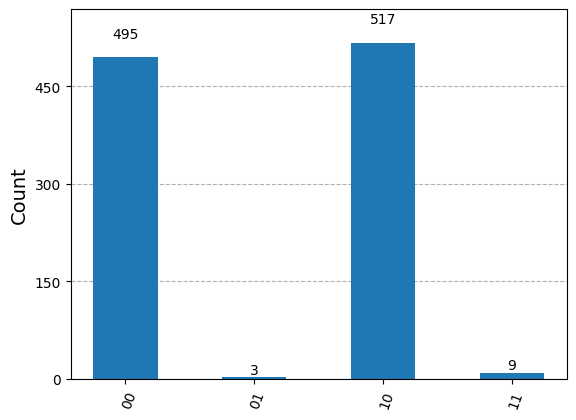

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator  

def create_qpca_circuit_2x2():
    num_qubits = 2
    ancilla_qubit = 1
    total_qubits = num_qubits + ancilla_qubit
    qc = QuantumCircuit(total_qubits, num_qubits)
    rho = np.array([[0.6, 0.4], [0.4, 0.4]])
    eigvals, eigvecs = np.linalg.eigh(rho)
    dominant_eigenvector = eigvecs[:, -1]
    full_init_state = np.kron(dominant_eigenvector, [1, 0])
    init_sv = Statevector(full_init_state)
    qc.initialize(init_sv, [0, 1])
    qc.cp(np.pi/2, 0, num_qubits) 
    qc.cp(np.pi/4, 1, num_qubits)  
    qc.append(QFT(num_qubits, inverse=True), range(num_qubits))
    qc.measure(range(num_qubits), range(num_qubits))
    return qc
simulator = AerSimulator()
circuit_2x2 = create_qpca_circuit_2x2()
compiled_circuit = transpile(circuit_2x2, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()
print("Measurement Outcomes:", counts)
plot_histogram(counts)

In [2]:
circuit_qpca = create_qpca_circuit_2x2()
print(circuit_qpca.draw())

     ┌────────────────────────────────────┐                  ┌───────┐┌─┐   
q_0: ┤0                                   ├─■────────────────┤0      ├┤M├───
     │  Initialize(-0.78821,0,-0.61541,0) │ │                │  IQFT │└╥┘┌─┐
q_1: ┤1                                   ├─┼────────■───────┤1      ├─╫─┤M├
     └────────────────────────────────────┘ │P(π/2)  │P(π/4) └───────┘ ║ └╥┘
q_2: ───────────────────────────────────────■────────■─────────────────╫──╫─
                                                                       ║  ║ 
c: 2/══════════════════════════════════════════════════════════════════╩══╩═
                                                                       0  1 


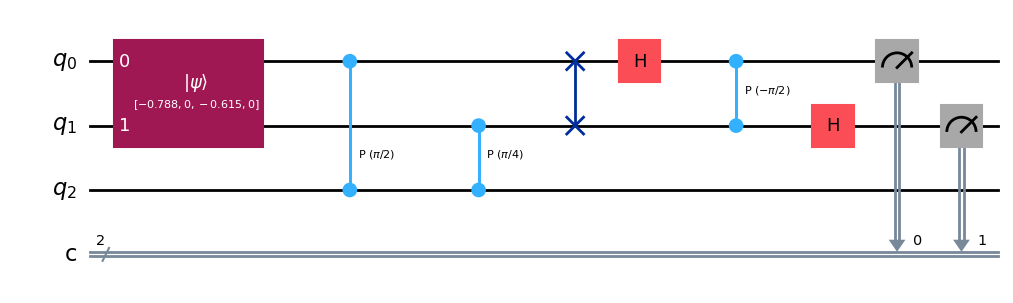

In [3]:
compiled_circuit.draw("mpl")

Measurement Outcomes: {'0111': 156, '1000': 193, '1010': 99, '1001': 167, '1101': 39, '1011': 7, '0010': 48, '0011': 39, '0110': 79, '1110': 56, '1111': 50, '0001': 48, '0100': 9, '0000': 21, '0101': 8, '1100': 5}


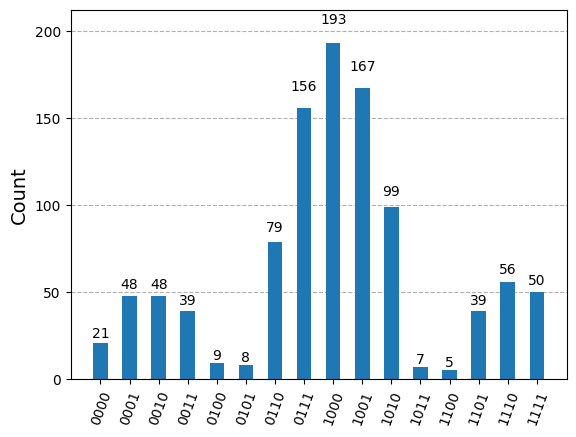

In [4]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator  

def compute_covariance_matrix(X):
    """
    Compute the covariance matrix of a 4xN dataset.
    Parameters:
        X (numpy.ndarray): A 4xN matrix where each row represents a feature, and each column represents a sample.
    Returns:
        numpy.ndarray: The 4x4 covariance matrix.
    """
    X = np.array(X)
    if X.shape[0] != 4:
        raise ValueError("Input dataset must have 4 features (4 rows).")
    mean_X = np.mean(X, axis=1, keepdims=True)
    X_centered = X - mean_X
    cov_matrix = (X_centered @ X_centered.T) / (X.shape[1] - 1)
    return cov_matrix
def create_qpca_circuit_4x4():
    num_qubits = 4
    ancilla_qubit = 1
    total_qubits = num_qubits + ancilla_qubit
    qc = QuantumCircuit(total_qubits, num_qubits)
    X_example = np.random.rand(4, 10)  
    rho = compute_covariance_matrix(X_example)
    eigvals, eigvecs = np.linalg.eigh(rho)
    dominant_eigenvector = eigvecs[:, -1] 
    state_dim = 2**num_qubits
    dominant_eigenvector_padded = np.pad(dominant_eigenvector, (0, state_dim - len(dominant_eigenvector)))
    init_sv = Statevector(dominant_eigenvector_padded)
    qc.initialize(init_sv, range(num_qubits))
    for i in range(num_qubits):
        qc.cp(np.pi / (2**(i+1)), i, num_qubits)
    qc.append(QFT(num_qubits, inverse=True), range(num_qubits))
    qc.measure(range(num_qubits), range(num_qubits))
    return qc
simulator = AerSimulator()
circuit_4x4 = create_qpca_circuit_4x4()
compiled_circuit = transpile(circuit_4x4, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()
print("Measurement Outcomes:", counts)
plot_histogram(counts)

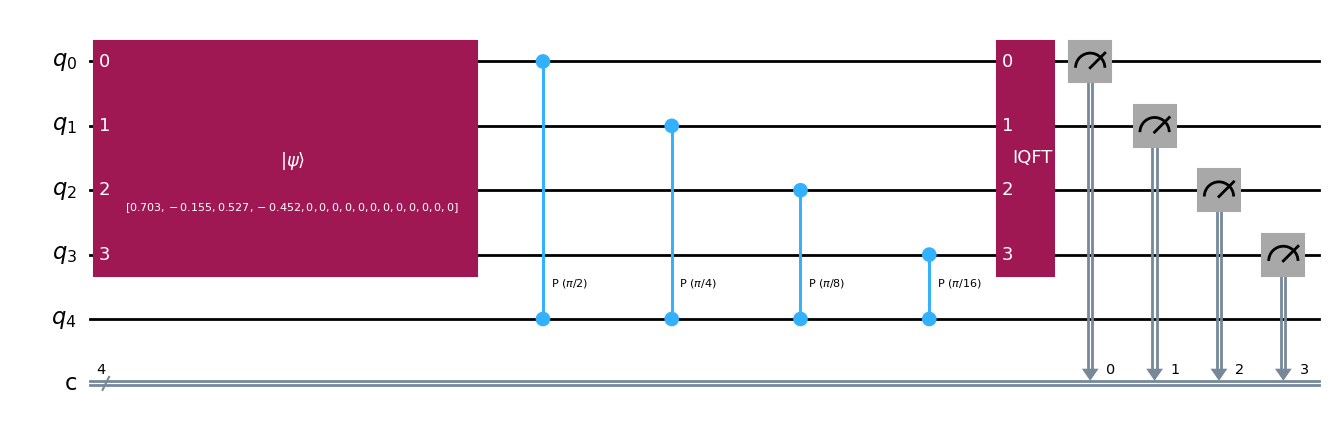

In [5]:
circuit_4x4.draw("mpl")

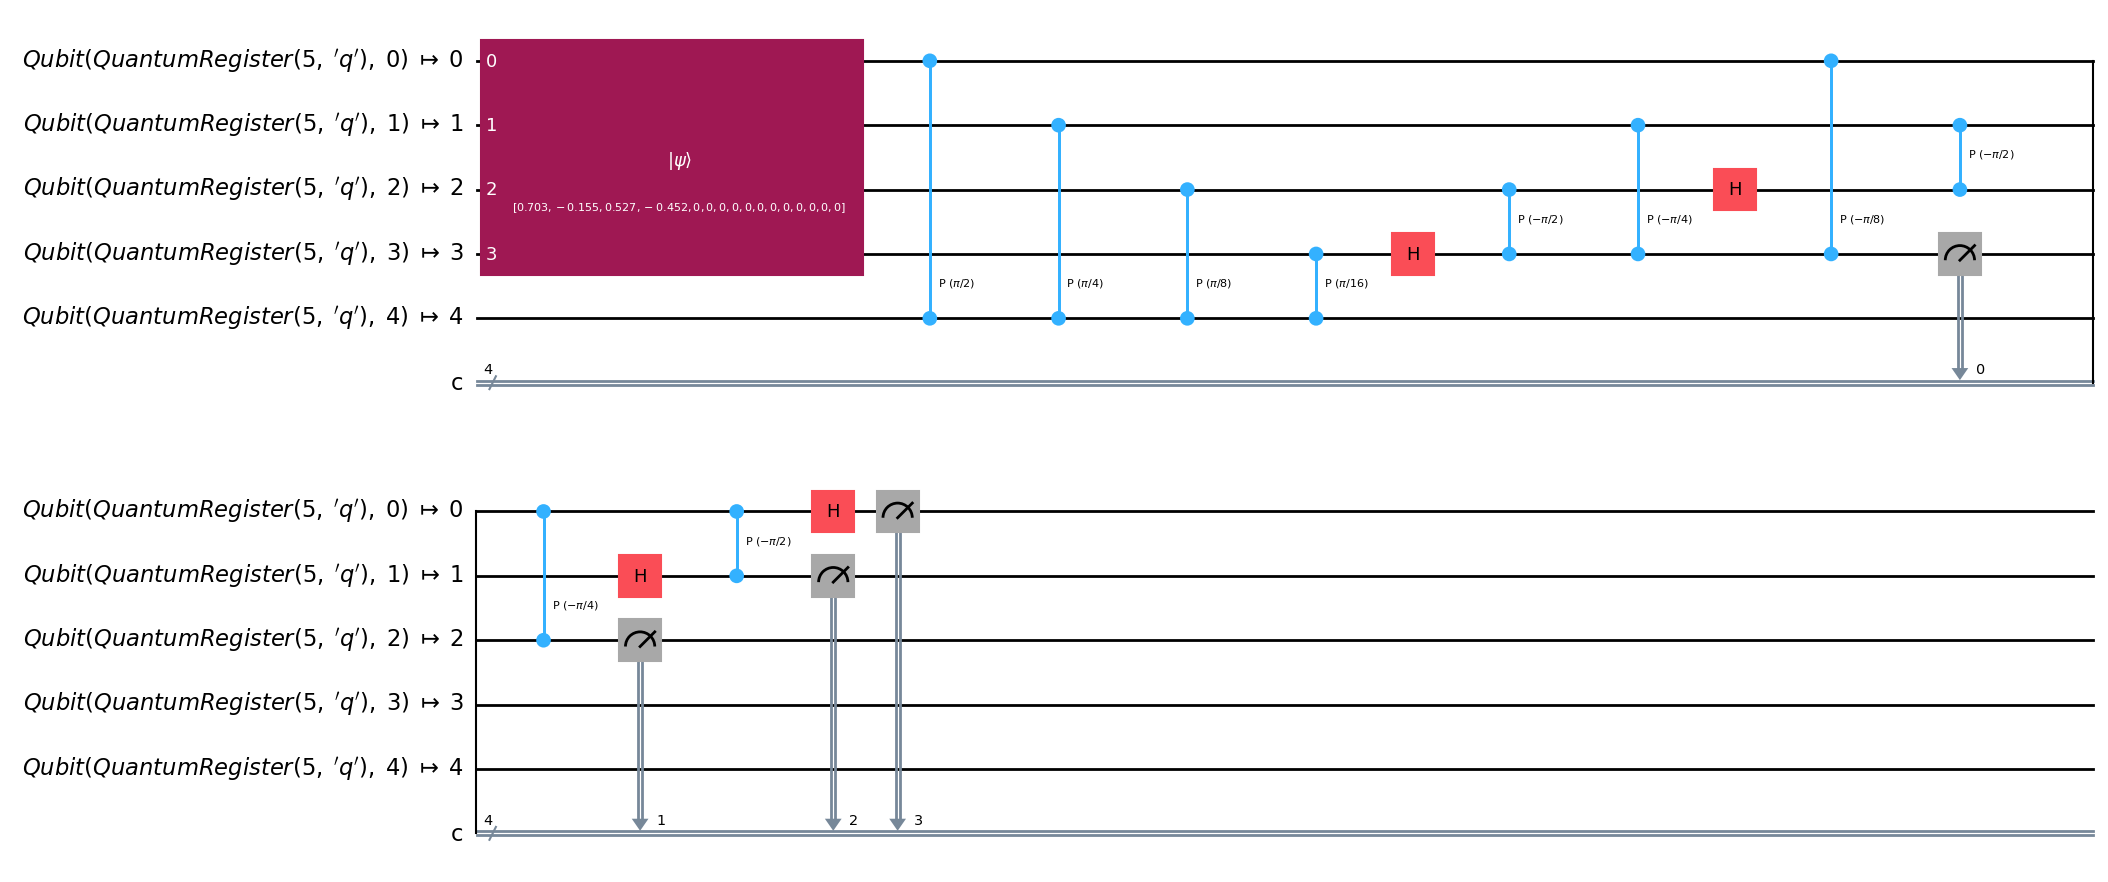

In [6]:
compiled_circuit.draw("mpl")